## Installing libraries

In [1]:
#@title Installing modules { form-width: "200px" }
# import matplotlib.pyplot as plt
# import matplotlib.colors as colors
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import sunpy.map
from sunpy.net import Fido, attrs as a
from sunpy.io import write_file
from sunpy.time import parse_time
from reproject import reproject_interp, reproject_adaptive, reproject_exact
from aiapy.calibrate import normalize_exposure, register, update_pointing, fix_observer_location

import astropy.units as u
from astropy.io import fits

import os, sys
import copy
from PIL import Image
from google.colab import files
from pathlib import Path


import sunpy.map
from sunpy.net import Fido, attrs as a
from sunpy.io import write_file
from sunpy.time import parse_time

import astropy.units as u
from astropy.io import fits

# import os, sys
# import copy
# from PIL import Image
from google.colab import files
from pathlib import Path

import os

from aiapy.calibrate import fix_observer_location, update_pointing, normalize_exposure, register
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from reproject import reproject_interp

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from scipy import ndimage
import sunpy.map
from sunpy.coordinates import Helioprojective, RotatedSunFrame, transform_with_sun_center
#from aiapy import aiaprep - moved to register() in aiapy


ModuleNotFoundError: No module named 'reproject'

In [4]:
import astropy.units as u

## Download data

In [7]:
#@title Fido data search { form-width: "200px" }
# import pytest

results = Fido.search(a.Time("2011-06-22T01:30:00","2011-06-24T01:30:00"), a.Instrument('AIA'),
                     a.Wavelength(193*u.angstrom), a.Sample(30*u.min))
# print(results)
# results = Fido.search(a.Time("2011-09-06T00:00:00","2011-09-08T23:50:00"), a.Instrument('AIA'),
#                      a.Wavelength(21.1*u.nm, 21.1*u.nm), a.Sample(2*u.hour))
# data_file = Fido.fetch(results, path = 'D:/POLIMI/THESIS/.fits_files/2011_09_06-211A-dimming_validation/DistortionAnalysis' )
data_file = Fido.fetch(results, path= r"C:/Users/galina.chikunova/Documents/python/20110621/load/")


# #opening the folder with maps
# data_folder = Path(r"/content/drive/MyDrive/Colab Notebooks/fits_files")
# listdir = os.listdir(data_folder)

In [ ]:
#@title Differential rotation function { form-width: "200px" }

def diff_rot(mapname, basemap):

    #in_time = mapname.date
    in_time = time_map
    #out_time = basemap.date
    out_time = time_base
    #out_time = in_time + time_diff  # if we want to shift on a specific time
    
    # The output frame is shifted in time for an observer at Earth 
    out_frame = Helioprojective(observer='earth', obstime= out_time, rsun= mapname.meta['rsun_ref']*u.m)
    rot_frame = RotatedSunFrame(base=out_frame, rotated_time=in_time)
    
    # Construct a WCS object for the output map with the target RotatedSunHelioprojective frame specified
    # instead of the regular Helioprojective frame.
    out_shape = mapname.data.shape

    
    # WCS converts cdelt and cunit from arcsec to deg
    out_wcs = basemap.wcs
    out_wcs.coordinate_frame = rot_frame



    # Reproject the map from the input frame to the output frame.
    with transform_with_sun_center():
        arr, _ = reproject_interp(mapname, out_wcs, out_shape)
    # Create the output map and preserve the original map’s plot settings.
    out_warp = sunpy.map.Map(arr, out_wcs)
    out_warp.plot_settings = mapname.plot_settings
    # make proper keywords
    out_warp.meta["date-obs"]=mapname.meta["date-obs"]
    out_warp.meta["instrume"]= mapname.meta['instrume']
    out_warp.meta["telescop"]= mapname.meta['telescop']
    out_warp.meta["wavelnth"] = mapname.meta['wavelnth']
    out_warp.meta["waveunit"] = mapname.meta["waveunit"]
    out_warp.meta["exptime"] = mapname.meta['exptime']
    
    out_warp.meta["cdelt1"]=mapname.meta['cdelt1']
    out_warp.meta["cdelt2"]=mapname.meta['cdelt2']
    out_warp.meta["cunit1"]=mapname.meta['cunit1']
    out_warp.meta["cunit2"]=mapname.meta['cunit2']
    out_warp.meta["rsun_obs"]= mapname.meta['rsun_obs']
    
    return out_warp


In [ ]:

def diff_rot1(mapname, basemap):

    #in_time = mapname.date
    in_time = time_base
    #out_time = basemap.date
    out_time = time_base
    #out_time = in_time + time_diff  # if we want to shift on a specific time
    
    # The output frame is shifted in time for an observer at Earth 
    out_frame = Helioprojective(observer='earth', obstime= out_time, rsun= mapname.meta['rsun_ref']*u.m)
    rot_frame = RotatedSunFrame(base=out_frame, rotated_time=in_time)
    
    # Construct a WCS object for the output map with the target RotatedSunHelioprojective frame specified
    # instead of the regular Helioprojective frame.
    out_shape = mapname.data.shape

    
    # WCS converts cdelt and cunit from arcsec to deg
    out_wcs = basemap.wcs
    out_wcs.coordinate_frame = rot_frame



    # Reproject the map from the input frame to the output frame.
    with transform_with_sun_center():
        arr, _ = reproject_interp(mapname, out_wcs, out_shape)
    # Create the output map and preserve the original map’s plot settings.
    out_warp = sunpy.map.Map(arr, out_wcs)
    out_warp.plot_settings = mapname.plot_settings
    # make proper keywords
    out_warp.meta["date-obs"]=mapname.meta["date-obs"]
    out_warp.meta["instrume"]= mapname.meta['instrume']
    out_warp.meta["telescop"]= mapname.meta['telescop']
    out_warp.meta["wavelnth"] = mapname.meta['wavelnth']
    out_warp.meta["waveunit"] = mapname.meta["waveunit"]
    out_warp.meta["exptime"] = mapname.meta['exptime']
    
    out_warp.meta["cdelt1"]=mapname.meta['cdelt1']
    out_warp.meta["cdelt2"]=mapname.meta['cdelt2']
    out_warp.meta["cunit1"]=mapname.meta['cunit1']
    out_warp.meta["cunit2"]=mapname.meta['cunit2']
    out_warp.meta["rsun_obs"]= mapname.meta['rsun_obs']
    
    return out_warp

## Calibration with diff rotation 

firstly to check the base map

Observatory,SDO
Instrument,AIA 3
Detector,AIA
Measurement,1600.0 Angstrom
Wavelength,1600.0 Angstrom
Observation Date,2021-11-01 23:09:02
Exposure Time,2.900727 s
Dimension,[4096. 4096.] pix
Coordinate System,helioprojective
Scale,[0.609373 0.609373] arcsec / pix
Reference Pixel,[2051.508789 2046.311523] pix

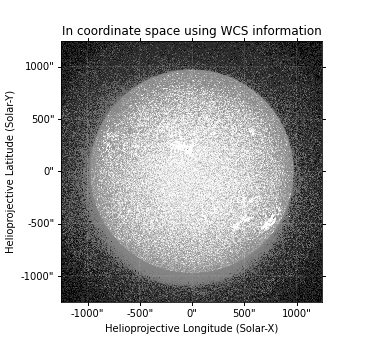
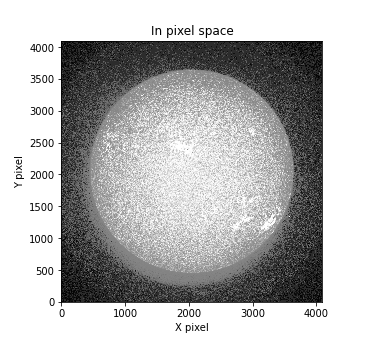
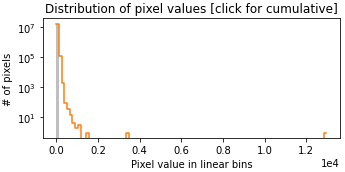
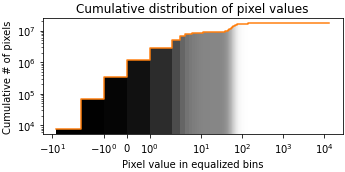

In [ ]:
data_folder = "/content/drive/MyDrive/Colab Notebooks/20211101_flare_rib/load/" # put your data folder
listdir = os.listdir(data_folder) #show elements in the folder
listdir = sorted(listdir)

base = data_folder+listdir[10]
basemap= sunpy.map.Map(base)

updated_pointing = update_pointing(basemap)
#observer_fixed = fix_observer_location(updated_pointing)

registered = register(updated_pointing)
basemap
#ormalized = normalize_exposure(registered)
#basemap = sunpy.map.Map(normalized)
#base_time=basemap.date
#basemap


then code of calibrating and diff rotating

In [ ]:
data_folder = "/content/drive/MyDrive/Colab Notebooks/20211101_flare_rib/load/"# put your data folder
data_save = "/content/drive/MyDrive/Colab Notebooks/20211101_flare_rib/fits_diff/"
listdir = os.listdir(data_folder) #show elements in the folder
listdir = sorted(listdir)

base = data_folder+listdir[0]
basemap= sunpy.map.Map(base)
base_time=basemap.date

updated_pointing = update_pointing(basemap)
observer_fixed = fix_observer_location(updated_pointing)
registered = register(observer_fixed)
normalized = normalize_exposure(registered)
basemap = sunpy.map.Map(normalized)


for i in range(0,len(listdir)):

    try:
        file_i=data_folder+listdir[i]

        # Map
        raw=sunpy.map.Map(file_i)

        in_time = raw.date
        print(listdir[i], 'i = ', i)

        # Calibrate the map
        updated_pointing = update_pointing(raw)
        observer_fixed = fix_observer_location(updated_pointing)
        registered = register(observer_fixed)
        normalized = normalize_exposure(registered)
        map = sunpy.map.Map(normalized)

        # Normalization
        #map = sunpy.map.Map(registered.data/registered.exposure_time.to(u.s).value,
        #                            registered.meta)

        diff_map = diff_rot(map, basemap)


        # Resampling
        new_dimensions = [2048, 2048] * u.pixel
        smap = diff_map.resample(new_dimensions) #out_warp
        smap.save(data_save+listdir[i][14:33]+'.fits')
    except OSError:
        pass


## Just calibration - without diff rotation

In [ ]:
data_folder = r"/content/drive/MyDrive/Colab Notebooks/load_Oct2021/304_load/"# put your data folder
listdir = os.listdir(data_folder) #show elements in the folder
listdir = sorted(listdir)

base = data_folder+listdir[0]
basemap= sunpy.map.Map(base)
base_time=basemap.date

for i in range(21,len(listdir)):

    file_i=data_folder+listdir[i]

    # Map
    raw=sunpy.map.Map(file_i)

    #in_time = raw.date
    print(listdir[i], 'бубу', i)

    # Calibrate the map
    updated_pointing = update_pointing(raw)
    observer_fixed = fix_observer_location(updated_pointing)
    registered = register(observer_fixed)

    # Normalization
    map = sunpy.map.Map(registered.data/registered.exposure_time.to(u.s).value,
                              registered.meta)

    # Resampling
    new_dimensions = [2048, 2048] * u.pixel
    res_map = map.resample(new_dimensions)
    # Saving to the folder
    res_map.save(data_folder+'fits_calibrated/'+listdir[i])

## Just diff rotation

In [ ]:
#@title Only diff rotation { form-width: "200px" }
data_folder = "/content/drive/MyDrive/Colab Notebooks/20211101_flare_rib/cal/"# put your data folder
data_save = "/content/drive/MyDrive/Colab Notebooks/20211101_flare_rib/fits_diff/"
listdir = os.listdir(data_folder) #show elements in the folder
listdir = sorted(listdir)

base = data_folder+listdir[0]
basemap= sunpy.map.Map(base)
base_time=basemap.date

for i in range(1,len(listdir)):

    try:
        file_i=data_folder+listdir[i]

        # Map
        raw=sunpy.map.Map(file_i)

        in_time = raw.date
        print(listdir[i], 'i = ', i)

        diff_map = diff_rot(raw, basemap)


        # Resampling
        new_dimensions = [2048, 2048] * u.pixel
        smap = diff_map.resample(new_dimensions) #out_warp
        smap.save(data_save+'Bdiff'+listdir[i][3:33])
    except OSError:
        pass


AIA20211101_230614_1600.fits i =  1


 [astropy.io.fits.verify]


AIA20211101_230638_1600.fits i =  2


 [astropy.io.fits.verify]


AIA20211101_230702_1600.fits i =  3


 [astropy.io.fits.verify]


AIA20211101_230726_1600.fits i =  4


 [astropy.io.fits.verify]


AIA20211101_230750_1600.fits i =  5


 [astropy.io.fits.verify]


AIA20211101_230814_1600.fits i =  6


 [astropy.io.fits.verify]


AIA20211101_230950_1600.fits i =  7


 [astropy.io.fits.verify]


AIA20211101_231014_1600.fits i =  8


 [astropy.io.fits.verify]


AIA20211101_231038_1600.fits i =  9


 [astropy.io.fits.verify]


AIA20211101_231102_1600.fits i =  10


 [astropy.io.fits.verify]


AIA20211101_231126_1600.fits i =  11


 [astropy.io.fits.verify]


AIA20211101_231150_1600.fits i =  12


 [astropy.io.fits.verify]


AIA20211101_231214_1600.fits i =  13


 [astropy.io.fits.verify]


AIA20211101_231238_1600.fits i =  14


 [astropy.io.fits.verify]


AIA20211101_231302_1600.fits i =  15


 [astropy.io.fits.verify]


AIA20211101_231326_1600.fits i =  16


 [astropy.io.fits.verify]


AIA20211101_231350_1600.fits i =  17


 [astropy.io.fits.verify]


AIA20211101_231414_1600.fits i =  18


 [astropy.io.fits.verify]


AIA20211101_231502_1600.fits i =  19


 [astropy.io.fits.verify]


AIA20211101_231526_1600.fits i =  20


 [astropy.io.fits.verify]


AIA20211101_231550_1600.fits i =  21


 [astropy.io.fits.verify]


AIA20211101_231614_1600.fits i =  22


 [astropy.io.fits.verify]


AIA20211101_231702_1600.fits i =  23


 [astropy.io.fits.verify]


AIA20211101_231726_1600.fits i =  24


 [astropy.io.fits.verify]


AIA20211101_231750_1600.fits i =  25


 [astropy.io.fits.verify]


AIA20211101_231814_1600.fits i =  26


 [astropy.io.fits.verify]


AIA20211101_231902_1600.fits i =  27


 [astropy.io.fits.verify]


AIA20211101_231950_1600.fits i =  28


 [astropy.io.fits.verify]


AIA20211101_232014_1600.fits i =  29


 [astropy.io.fits.verify]


AIA20211101_232126_1600.fits i =  30


 [astropy.io.fits.verify]


AIA20211101_232150_1600.fits i =  31


 [astropy.io.fits.verify]


AIA20211101_232214_1600.fits i =  32


 [astropy.io.fits.verify]


AIA20211101_232302_1600.fits i =  33


 [astropy.io.fits.verify]


AIA20211101_232326_1600.fits i =  34


 [astropy.io.fits.verify]


AIA20211101_232414_1600.fits i =  35


 [astropy.io.fits.verify]


AIA20211101_232502_1600.fits i =  36


 [astropy.io.fits.verify]


AIA20211101_232526_1600.fits i =  37


 [astropy.io.fits.verify]


AIA20211101_232550_1600.fits i =  38


 [astropy.io.fits.verify]


AIA20211101_232614_1600.fits i =  39


 [astropy.io.fits.verify]


AIA20211101_232638_1600.fits i =  40


 [astropy.io.fits.verify]


AIA20211101_232702_1600.fits i =  41


 [astropy.io.fits.verify]


AIA20211101_232726_1600.fits i =  42


 [astropy.io.fits.verify]


AIA20211101_232750_1600.fits i =  43


 [astropy.io.fits.verify]


AIA20211101_232814_1600.fits i =  44


 [astropy.io.fits.verify]


AIA20211101_232926_1600.fits i =  45


 [astropy.io.fits.verify]


AIA20211101_232950_1600.fits i =  46


 [astropy.io.fits.verify]


AIA20211101_233014_1600.fits i =  47


 [astropy.io.fits.verify]


AIA20211101_233038_1600.fits i =  48


 [astropy.io.fits.verify]


AIA20211101_233126_1600.fits i =  49


 [astropy.io.fits.verify]


AIA20211101_233214_1600.fits i =  50


 [astropy.io.fits.verify]


AIA20211101_233238_1600.fits i =  51


 [astropy.io.fits.verify]


AIA20211101_233302_1600.fits i =  52


 [astropy.io.fits.verify]


AIA20211101_233326_1600.fits i =  53


 [astropy.io.fits.verify]


AIA20211101_233350_1600.fits i =  54


 [astropy.io.fits.verify]


AIA20211101_233414_1600.fits i =  55


 [astropy.io.fits.verify]


AIA20211101_233438_1600.fits i =  56


 [astropy.io.fits.verify]


AIA20211101_233526_1600.fits i =  57


 [astropy.io.fits.verify]


AIA20211101_233614_1600.fits i =  58


 [astropy.io.fits.verify]


AIA20211101_233638_1600.fits i =  59


 [astropy.io.fits.verify]


AIA20211101_233702_1600.fits i =  60


 [astropy.io.fits.verify]


AIA20211101_233726_1600.fits i =  61


 [astropy.io.fits.verify]


AIA20211101_233750_1600.fits i =  62


 [astropy.io.fits.verify]


AIA20211101_233814_1600.fits i =  63


 [astropy.io.fits.verify]


AIA20211101_233902_1600.fits i =  64


 [astropy.io.fits.verify]


AIA20211101_233926_1600.fits i =  65


 [astropy.io.fits.verify]


AIA20211101_233950_1600.fits i =  66


 [astropy.io.fits.verify]


AIA20211101_234014_1600.fits i =  67


 [astropy.io.fits.verify]


AIA20211101_234038_1600.fits i =  68


 [astropy.io.fits.verify]


AIA20211101_234126_1600.fits i =  69


 [astropy.io.fits.verify]


AIA20211101_234150_1600.fits i =  70


 [astropy.io.fits.verify]


AIA20211101_234214_1600.fits i =  71


 [astropy.io.fits.verify]


AIA20211101_234238_1600.fits i =  72


 [astropy.io.fits.verify]


AIA20211101_234302_1600.fits i =  73


 [astropy.io.fits.verify]


AIA20211101_234326_1600.fits i =  74


 [astropy.io.fits.verify]


AIA20211101_234350_1600.fits i =  75


 [astropy.io.fits.verify]


AIA20211101_234414_1600.fits i =  76


 [astropy.io.fits.verify]


AIA20211101_234438_1600.fits i =  77


 [astropy.io.fits.verify]


AIA20211101_234814_1600.fits i =  78


 [astropy.io.fits.verify]


AIA20211101_234838_1600.fits i =  79


 [astropy.io.fits.verify]


AIA20211101_234902_1600.fits i =  80


 [astropy.io.fits.verify]


AIA20211101_234926_1600.fits i =  81


 [astropy.io.fits.verify]


AIA20211101_234950_1600.fits i =  82


 [astropy.io.fits.verify]


AIA20211101_235014_1600.fits i =  83


 [astropy.io.fits.verify]


AIA20211101_235038_1600.fits i =  84


 [astropy.io.fits.verify]


AIA20211101_235102_1600.fits i =  85


 [astropy.io.fits.verify]


AIA20211101_235126_1600.fits i =  86


 [astropy.io.fits.verify]


AIA20211101_235150_1600.fits i =  87


 [astropy.io.fits.verify]


AIA20211101_235214_1600.fits i =  88


 [astropy.io.fits.verify]


AIA20211101_235238_1600.fits i =  89


 [astropy.io.fits.verify]


AIA20211101_235302_1600.fits i =  90


 [astropy.io.fits.verify]


AIA20211101_235326_1600.fits i =  91


 [astropy.io.fits.verify]


AIA20211101_235350_1600.fits i =  92


 [astropy.io.fits.verify]


AIA20211101_235414_1600.fits i =  93


 [astropy.io.fits.verify]


AIA20211101_235438_1600.fits i =  94


 [astropy.io.fits.verify]


AIA20211101_235502_1600.fits i =  95


 [astropy.io.fits.verify]


AIA20211101_235526_1600.fits i =  96


 [astropy.io.fits.verify]


AIA20211101_235550_1600.fits i =  97


 [astropy.io.fits.verify]


AIA20211101_235638_1600.fits i =  98


 [astropy.io.fits.verify]


AIA20211101_235702_1600.fits i =  99


 [astropy.io.fits.verify]


AIA20211101_235726_1600.fits i =  100


 [astropy.io.fits.verify]


AIA20211101_235750_1600.fits i =  101


 [astropy.io.fits.verify]


AIA20211101_235814_1600.fits i =  102


 [astropy.io.fits.verify]


AIA20211101_235902_1600.fits i =  103


 [astropy.io.fits.verify]


AIA20211101_235926_1600.fits i =  104


 [astropy.io.fits.verify]


AIA20211101_235950_1600.fits i =  105


 [astropy.io.fits.verify]


AIA20211102_000014_1600.fits i =  106


 [astropy.io.fits.verify]


AIA20211102_000038_1600.fits i =  107


 [astropy.io.fits.verify]


AIA20211102_000126_1600.fits i =  108


 [astropy.io.fits.verify]


AIA20211102_000150_1600.fits i =  109


 [astropy.io.fits.verify]


AIA20211102_000214_1600.fits i =  110


 [astropy.io.fits.verify]


AIA20211102_000238_1600.fits i =  111


 [astropy.io.fits.verify]


AIA20211102_000302_1600.fits i =  112


 [astropy.io.fits.verify]


AIA20211102_000326_1600.fits i =  113


 [astropy.io.fits.verify]


AIA20211102_000414_1600.fits i =  114


 [astropy.io.fits.verify]


AIA20211102_000438_1600.fits i =  115


 [astropy.io.fits.verify]


AIA20211102_000502_1600.fits i =  116


 [astropy.io.fits.verify]


AIA20211102_000550_1600.fits i =  117


 [astropy.io.fits.verify]


AIA20211102_000614_1600.fits i =  118


 [astropy.io.fits.verify]


AIA20211102_000638_1600.fits i =  119


 [astropy.io.fits.verify]


AIA20211102_000702_1600.fits i =  120


 [astropy.io.fits.verify]


AIA20211102_000726_1600.fits i =  121


 [astropy.io.fits.verify]


AIA20211102_000750_1600.fits i =  122


 [astropy.io.fits.verify]


AIA20211102_000814_1600.fits i =  123


 [astropy.io.fits.verify]


AIA20211102_000838_1600.fits i =  124


 [astropy.io.fits.verify]


AIA20211102_000902_1600.fits i =  125


 [astropy.io.fits.verify]


AIA20211102_000926_1600.fits i =  126


 [astropy.io.fits.verify]


AIA20211102_000950_1600.fits i =  127


 [astropy.io.fits.verify]


AIA20211102_001014_1600.fits i =  128


 [astropy.io.fits.verify]


AIA20211102_001038_1600.fits i =  129


 [astropy.io.fits.verify]


AIA20211102_001214_1600.fits i =  130


 [astropy.io.fits.verify]


AIA20211102_001302_1600.fits i =  131


 [astropy.io.fits.verify]


AIA20211102_001326_1600.fits i =  132


 [astropy.io.fits.verify]


AIA20211102_001350_1600.fits i =  133


 [astropy.io.fits.verify]


AIA20211102_001414_1600.fits i =  134


 [astropy.io.fits.verify]


AIA20211102_001438_1600.fits i =  135


 [astropy.io.fits.verify]


AIA20211102_001502_1600.fits i =  136


 [astropy.io.fits.verify]


AIA20211102_001550_1600.fits i =  137


 [astropy.io.fits.verify]


AIA20211102_001638_1600.fits i =  138


 [astropy.io.fits.verify]


AIA20211102_001702_1600.fits i =  139


 [astropy.io.fits.verify]


AIA20211102_001726_1600.fits i =  140


 [astropy.io.fits.verify]


AIA20211102_001750_1600.fits i =  141


 [astropy.io.fits.verify]


AIA20211102_001814_1600.fits i =  142


 [astropy.io.fits.verify]


AIA20211102_001926_1600.fits i =  143


 [astropy.io.fits.verify]


AIA20211102_001950_1600.fits i =  144


 [astropy.io.fits.verify]


AIA20211102_002014_1600.fits i =  145


 [astropy.io.fits.verify]


AIA20211102_002038_1600.fits i =  146


 [astropy.io.fits.verify]


AIA20211102_002126_1600.fits i =  147


 [astropy.io.fits.verify]


AIA20211102_002150_1600.fits i =  148


 [astropy.io.fits.verify]


AIA20211102_002214_1600.fits i =  149


 [astropy.io.fits.verify]


AIA20211102_002302_1600.fits i =  150


 [astropy.io.fits.verify]


AIA20211102_002326_1600.fits i =  151


 [astropy.io.fits.verify]


AIA20211102_002350_1600.fits i =  152


 [astropy.io.fits.verify]


AIA20211102_002614_1600.fits i =  153


 [astropy.io.fits.verify]


AIA20211102_002702_1600.fits i =  154


 [astropy.io.fits.verify]


AIA20211102_002726_1600.fits i =  155


 [astropy.io.fits.verify]


AIA20211102_002750_1600.fits i =  156


 [astropy.io.fits.verify]


AIA20211102_002814_1600.fits i =  157


 [astropy.io.fits.verify]


AIA20211102_002838_1600.fits i =  158


 [astropy.io.fits.verify]


AIA20211102_002950_1600.fits i =  159


 [astropy.io.fits.verify]


AIA20211102_003038_1600.fits i =  160


 [astropy.io.fits.verify]


AIA20211102_003126_1600.fits i =  161


 [astropy.io.fits.verify]


AIA20211102_003150_1600.fits i =  162


 [astropy.io.fits.verify]


AIA20211102_003214_1600.fits i =  163


 [astropy.io.fits.verify]


AIA20211102_003238_1600.fits i =  164


 [astropy.io.fits.verify]


AIA20211102_003302_1600.fits i =  165


 [astropy.io.fits.verify]


AIA20211102_003326_1600.fits i =  166


 [astropy.io.fits.verify]


AIA20211102_003502_1600.fits i =  167


 [astropy.io.fits.verify]


AIA20211102_003526_1600.fits i =  168


 [astropy.io.fits.verify]


AIA20211102_003550_1600.fits i =  169


 [astropy.io.fits.verify]


AIA20211102_003614_1600.fits i =  170


 [astropy.io.fits.verify]


AIA20211102_003702_1600.fits i =  171


 [astropy.io.fits.verify]


AIA20211102_003726_1600.fits i =  172


 [astropy.io.fits.verify]


AIA20211102_003750_1600.fits i =  173


 [astropy.io.fits.verify]


AIA20211102_003814_1600.fits i =  174


 [astropy.io.fits.verify]


AIA20211102_003838_1600.fits i =  175


 [astropy.io.fits.verify]


AIA20211102_003902_1600.fits i =  176


 [astropy.io.fits.verify]


AIA20211102_003926_1600.fits i =  177


 [astropy.io.fits.verify]


AIA20211102_003950_1600.fits i =  178


 [astropy.io.fits.verify]


AIA20211102_004014_1600.fits i =  179


 [astropy.io.fits.verify]


AIA20211102_004038_1600.fits i =  180


 [astropy.io.fits.verify]


AIA20211102_004102_1600.fits i =  181


 [astropy.io.fits.verify]


AIA20211102_004126_1600.fits i =  182


 [astropy.io.fits.verify]


AIA20211102_004150_1600.fits i =  183


 [astropy.io.fits.verify]


AIA20211102_004214_1600.fits i =  184


 [astropy.io.fits.verify]


AIA20211102_004238_1600.fits i =  185


 [astropy.io.fits.verify]


AIA20211102_004302_1600.fits i =  186


 [astropy.io.fits.verify]


AIA20211102_004326_1600.fits i =  187


 [astropy.io.fits.verify]


AIA20211102_004350_1600.fits i =  188


 [astropy.io.fits.verify]


AIA20211102_004414_1600.fits i =  189


 [astropy.io.fits.verify]


AIA20211102_004438_1600.fits i =  190


 [astropy.io.fits.verify]


AIA20211102_004502_1600.fits i =  191


 [astropy.io.fits.verify]


AIA20211102_004526_1600.fits i =  192


 [astropy.io.fits.verify]


AIA20211102_004638_1600.fits i =  193


KeyboardInterrupt: ignored

## For one map

In [ ]:
#@title For one map { form-width: "200px" }
data_folder = '/content/drive/MyDrive/Thesis project/fits_to_calibrate/' # put your data folder
listdir = os.listdir(data_folder) #show elements in the folder

basemap_file=data_folder+listdir[0]

# base Map
base_raw=sunpy.map.Map(basemap_file)
# print(base_raw.meta)

# Calibration
# Qtable= get_pointing_table("2011-09-06T20:30:00", "2011-09-06T23:59:00")
# print(Qtable)
# base_updated_pointing= update_pointing(base_raw, Qtable)
base_updated_pointing= update_pointing(base_raw)
base_observer_fixed= fix_observer_location(base_updated_pointing)
base_registered = register(base_observer_fixed)
# print('\n\n', base_registered.meta)

# Normalization
basemap = sunpy.map.Map(base_registered.data/base_registered.exposure_time.to(u.s).value,
                             base_registered.meta)

# Resampling
new_dimensions = [2048, 2048] * u.pixel
basemap = basemap.resample(new_dimensions)

In [ ]:
plt.figure()
basemap.plot()